Accuracy: 0.8


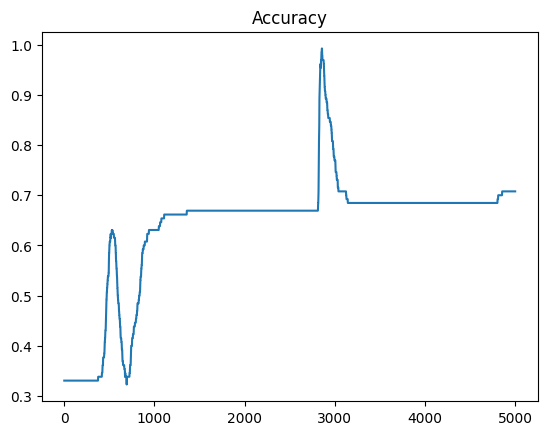

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# In[16]:


# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target


# In[17]:


# Get dummy variable
y = pd.get_dummies(y).values

y[:3]


# In[18]:


#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)


# In[19]:


# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])


# In[20]:


# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))


# In[21]:


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()


# In[22]:


for itr in range(iterations):

    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)


    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse":[mse], "accuracy":[acc]})], ignore_index=True)

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


# In[23]:


#results.mse.plot(title="Mean Squared Error")


# In[24]:


results.accuracy.plot(title="Accuracy")


# In[25]:


# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

In [3]:
import numpy as np

x = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
#print(x)
#print(y)
x = x/np.amax(x,axis=0)
y=y/100
#print(x)
#print(y)

#Variables initialization

epoch=100 #Setting training iterations

lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of input layer neurons

hiddenlayer_neurons = 3 #number of hidden layers neurons

output_neurons = 1 #number of neurons at output layer

#Defining weight and biases for hidden and output layer

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))

bh=np.random.uniform(size=(1,hiddenlayer_neurons))

wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

bout=np.random.uniform(size=(1,output_neurons))


#Defining Sigmoid Function for output

def sigmoid (x):

    return (1/(1 + np.exp(-x)))

#Derivative of Sigmoid Function

def derivatives_sigmoid(x):

    return x * (1 - x)

#Forward Propagation

for i in range(epoch):

    hinp1=np.dot(x,wh)

    hinp=hinp1 + bh

    hlayer_act = sigmoid(hinp)

    outinp1=np.dot(hlayer_act,wout)

    outinp= outinp1+ bout

    output = sigmoid(outinp)


#Backpropagation Algorithm

EO = y-output

outgrad = derivatives_sigmoid(output)

d_output = EO* outgrad

EH = d_output.dot(wout.T)

hiddengrad = derivatives_sigmoid(hlayer_act)



#how much hidden layer wts contributed to error

d_hiddenlayer = EH * hiddengrad

wout += hlayer_act.T.dot(d_output) *lr





# dotproduct of nextlayererror and currentlayerop

bout += np.sum(d_output, axis=0,keepdims=True) *lr



#Updating Weights

wh += x.T.dot(d_hiddenlayer) *lr

print("Actual Output: \n" + str(y))

print("Predicted Output: \n" ,output)

print("Error:\n"+str(EO))
print ("-----------Epoch-", i+1, "Ends----------\n")

print("Actual ouput"+str(y))
print("Predicted Output"+str(output))
print("Error"+str(EO))



Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.90141248]
 [0.88903082]
 [0.90409524]]
Error:
[[ 0.01858752]
 [-0.02903082]
 [-0.01409524]]
-----------Epoch- 100 Ends----------

Actual ouput[[0.92]
 [0.86]
 [0.89]]
Predicted Output[[0.90141248]
 [0.88903082]
 [0.90409524]]
Error[[ 0.01858752]
 [-0.02903082]
 [-0.01409524]]
